In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

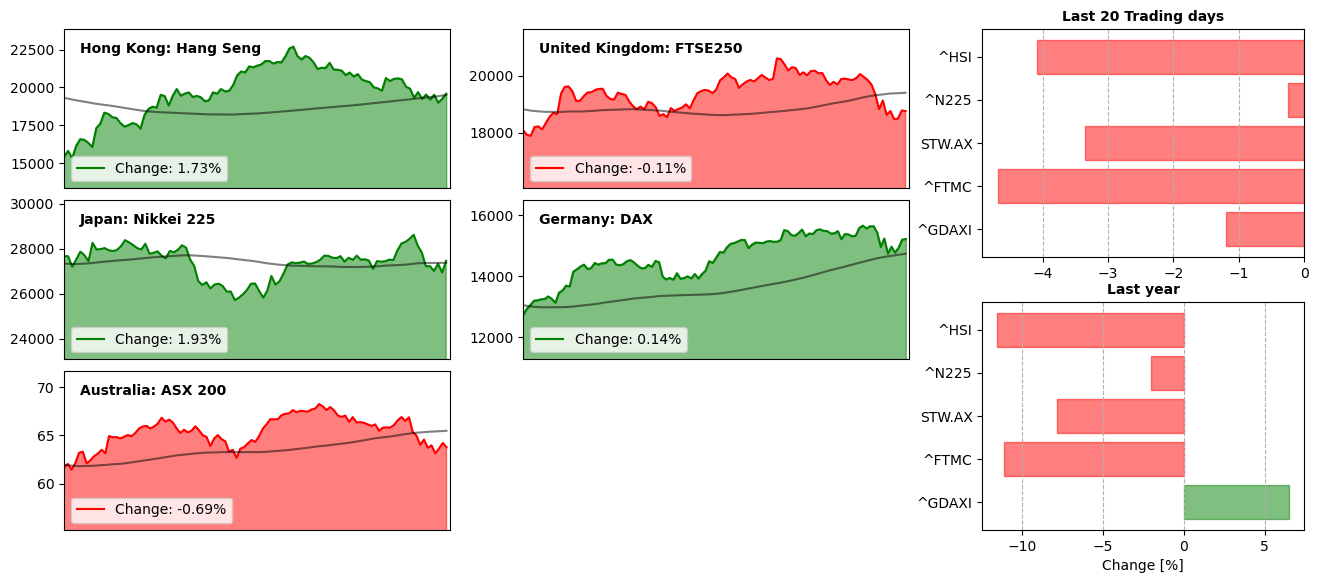

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 23-03-2023 at 11:21:38


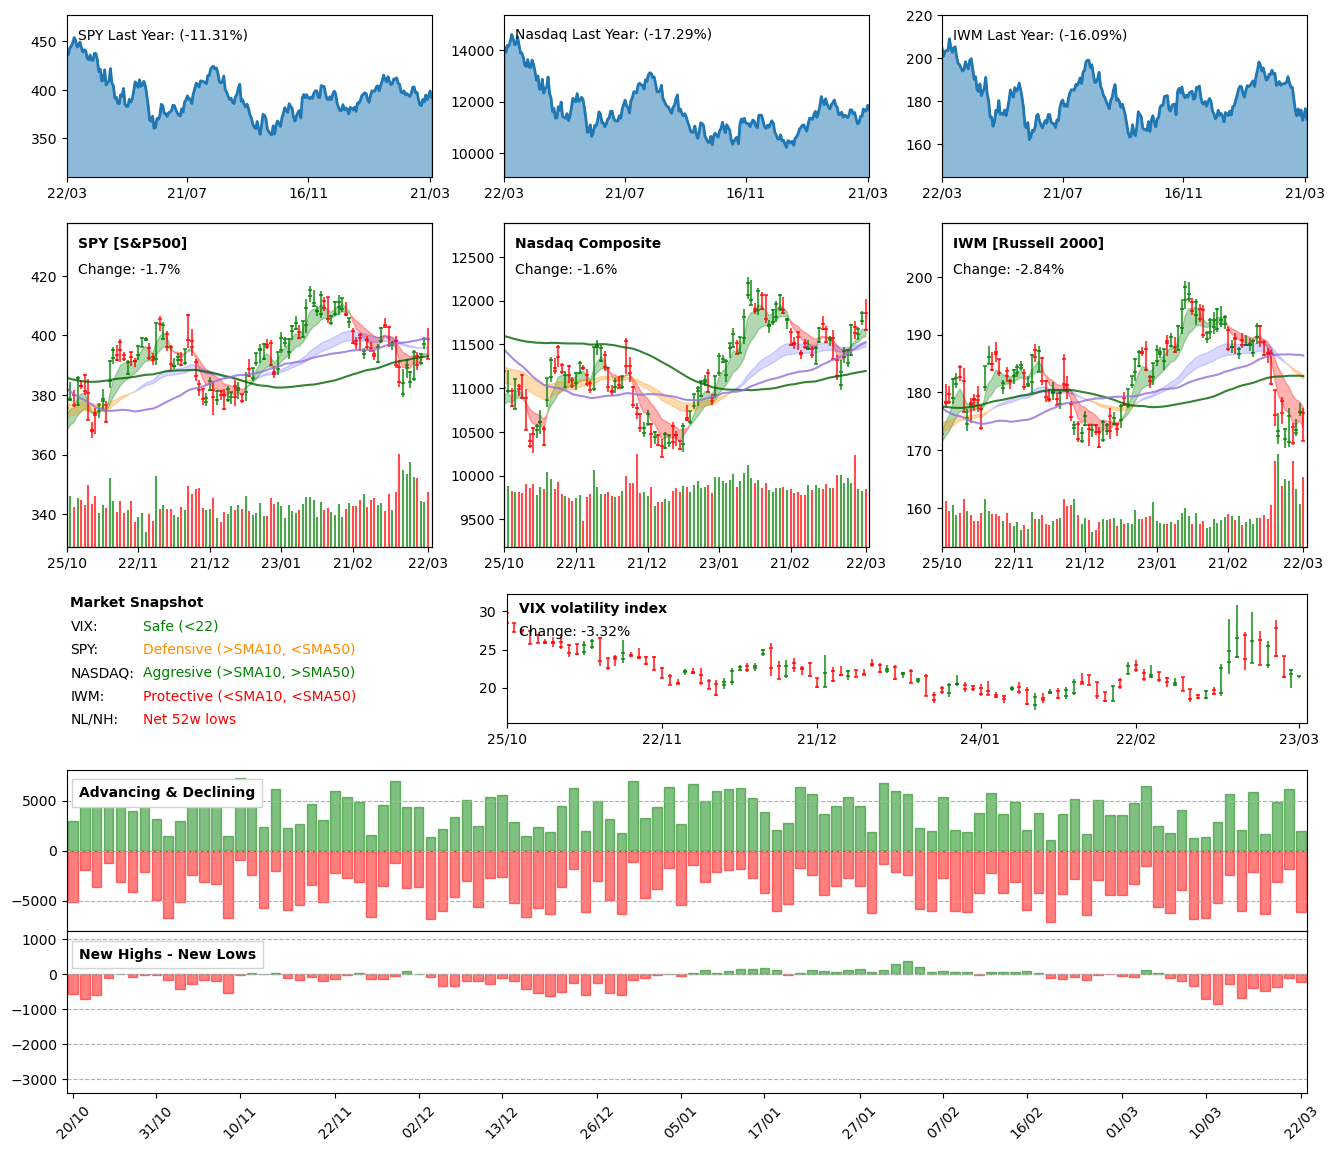

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

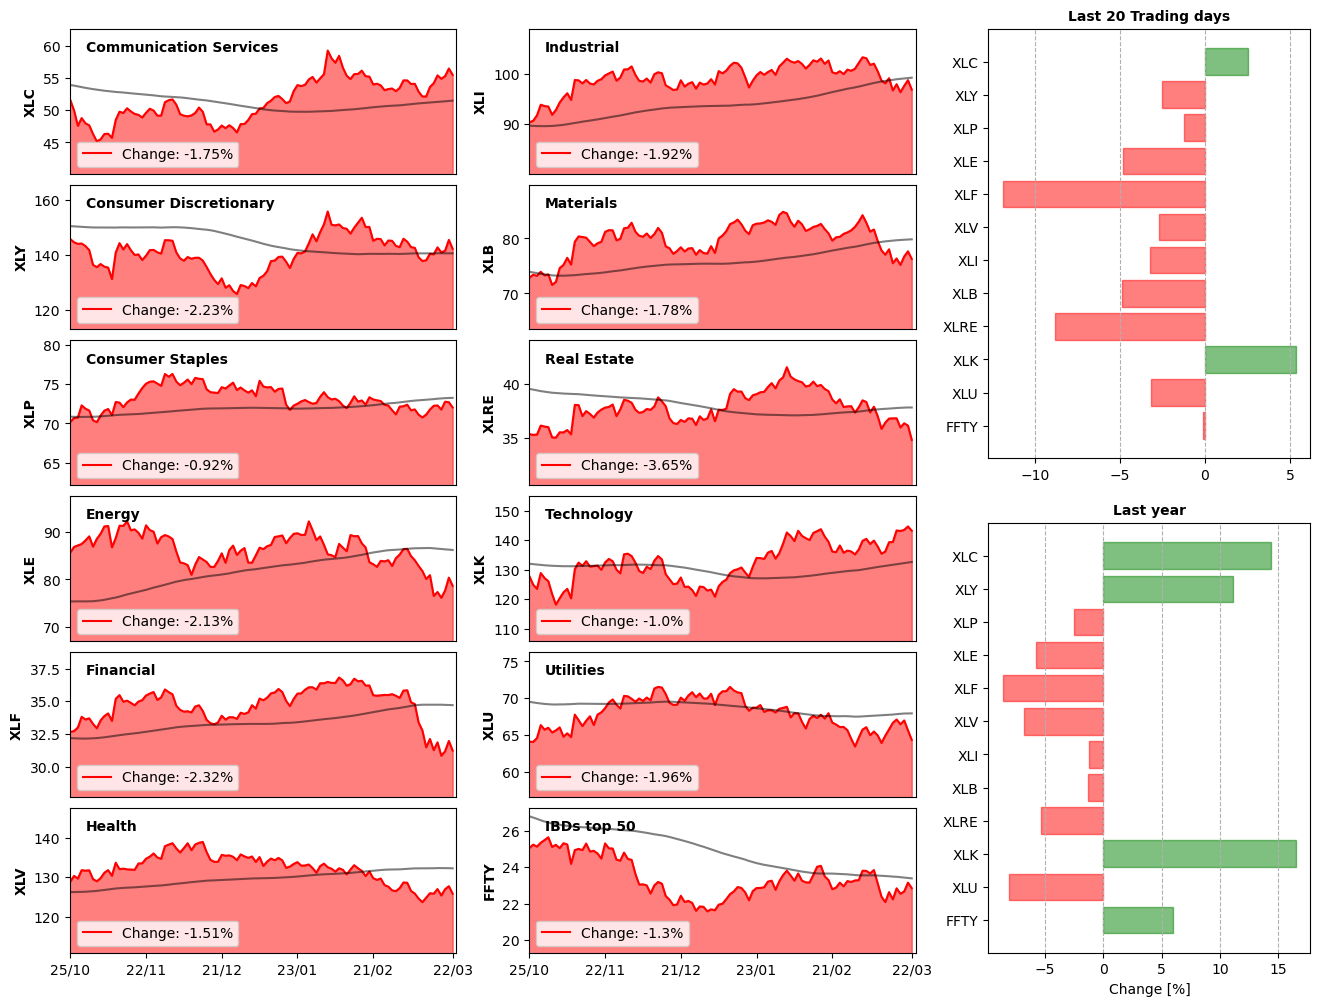

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Internet Content & Information,6.39,12.44,6.86,-22.31,0.86,-1.43,0
Semiconductors,5.18,10.44,30.07,-9.33,1.26,-0.26,0
Gold,4.10,8.22,24.44,-22.97,1.10,1.33,0
Consumer Electronics,3.21,6.19,1.35,-5.23,0.94,-0.96,0
Residential Construction,2.11,6.02,35.77,12.61,1.23,-0.79,1
Software - Infrastructure,2.70,5.07,10.70,-13.42,0.97,-1.13,-1
Shell Companies,6.07,4.94,8.68,6.28,1.68,1.06,2
Silver,0.92,3.45,5.72,-37.86,1.51,3.79,38
Semiconductor Equipment & Materials,3.50,2.97,30.32,-7.21,1.06,-0.72,9
Electronic Gaming & Multimedia,0.81,2.73,3.30,-8.68,0.58,-2.05,-3


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Financial Conglomerates,1.20,-14.35,-4.33,-22.54,1.08,-2.70,4
Aluminum,0.56,-14.39,-1.34,-51.63,1.06,-3.88,-22
REIT - Mortgage,-1.93,-14.66,-21.03,-33.66,1.14,-2.45,3
Capital Markets,0.67,-14.82,-4.74,-15.93,1.32,-2.53,-4
Insurance - Life,0.02,-15.02,-3.45,-15.04,1.05,-2.70,-1
Department Stores,-5.31,-15.02,-4.38,-33.50,0.91,-3.86,3
REIT - Healthcare Facilities,-7.65,-16.42,-14.20,-31.44,1.13,-4.24,-6
Banks - Regional,-0.43,-18.92,-18.83,-26.51,1.75,-3.50,-1
Broadcasting,-1.05,-21.92,-35.49,-44.05,1.21,-4.01,-1
REIT - Office,-8.61,-25.11,-30.53,-53.00,1.60,-5.20,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Silver,0.92,3.45,5.72,-37.86,1.51,3.79,5.722900
Other Precious Metals & Mining,3.05,2.21,17.05,-27.31,1.09,2.29,2.496100
Shell Companies,6.07,4.94,8.68,6.28,1.68,1.06,1.780800
Gold,4.10,8.22,24.44,-22.97,1.10,1.33,1.463000
Beverages - Brewers,1.96,2.01,14.31,-0.15,0.80,0.23,0.184000
Beverages - Wineries & Distilleries,2.51,-1.26,-5.51,-6.31,0.74,0.14,0.103600
Grocery Stores,-1.19,0.09,0.17,-14.15,1.38,0.06,0.082800
Airports & Air Services,0.97,-1.74,17.26,17.39,0.81,0.07,0.056700
Publishing,2.99,1.62,21.05,-0.65,1.00,-0.06,-0.060000
Household & Personal Products,1.25,-0.07,5.26,-2.97,0.88,-0.12,-0.105600


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
# os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0